### Exercise 2.

Load dataset dự đoán cho vay:
    
a. Dùng gradient descent tìm mô hình logistic regression cho bài toán

b. Dự đoán hồ sơ lương 6tr, 1 năm kn xem có cho vay ko

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('dataset.csv')
data.head()

,Lương,Thời gian làm việc,Cho vay
0,10,1.0,1
1,5,2.0,1
2,6,1.8,1
3,7,1.0,1
4,8,2.0,1


In [12]:
def sigmoid_func(z):
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

In [19]:
def Loss_func(Y, X, w):
    Loss = -np.mean(Y * np.log(sigmoid_func(np.dot(X, w))) + (1-Y) * np.log(1-sigmoid_func(np.dot(X, w))))
    return Loss

In [14]:
X = data.drop(columns='Cho vay')
Y = pd.DataFrame(data['Cho vay'])
X['x0'] = pd.Series(np.ones(len(X)))

In [15]:
X.head()

,Lương,Thời gian làm việc,x0
0,10,1.0,1.0
1,5,2.0,1.0
2,6,1.8,1.0
3,7,1.0,1.0
4,8,2.0,1.0


In [16]:
X.shape

(20, 3)

In [17]:
Y.shape

(20, 1)

In [20]:
# intitialize w
w = pd.DataFrame(np.zeros(shape=X.shape[1]))

iteration = 1000
learning_rate = 0.05
L = [] 

for _ in range(iteration):
    error = Loss_func(Y, X, w)
    L.append(error)   # Update list of Loss after each iteration
    for i in range(X.shape[1]):
        # w = w - learning_rate * np.dot(x.T, y_predict-y)
        w[0][i] = w[0][i] - learning_rate*np.mean((sigmoid_func(np.dot(X, w)) - Y.to_numpy()).T * X.to_numpy()[:, i])
print('Loss = {}'.format(L[-1]))

Loss = Cho vay    0.320164
dtype: float64


In [21]:
w0 = w[0][0]
w1 = w[0][1]
w2 = w[0][2]
print(w0)
print(w1)
print(w2)

0.10757033654180372
2.260568014210126
-2.606103887254749


Text(0, 0.5, 'Iteration')

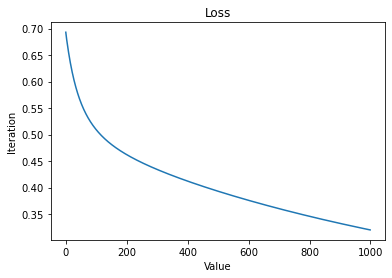

In [24]:
plt.plot(L)
plt.title('Loss')
plt.xlabel('Value')
plt.ylabel('Iteration')

In [25]:
test = pd.DataFrame(data=np.array([[6, 1]]), columns=['Lương', 'Thời gian làm việc'])
test['x0'] = pd.Series(np.ones(len(X)))
test

,Lương,Thời gian làm việc,x0
0,6,1,1.0


In [27]:
prediction = sigmoid_func(np.dot(test, w))
prediction

array([[0.57441468]])

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
df = pd.read_csv('dataset.csv').values
N, d = data.shape
x = df[:, 0:d-1].reshape(-1, d-1)
y = df[:, 2].reshape(-1, 1)

Text(0, 0.5, 'kinh nghiệm (năm)')

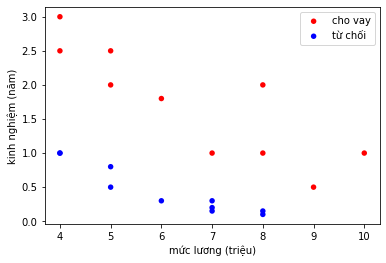

In [30]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [31]:
# Logistic Regression & train
logreg = LogisticRegression()
logreg.fit(x, y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [32]:
# Lưu các biến của mô hình vào mảng
wg = np.zeros( (3, 1) )
wg[0, 0] = logreg.intercept_
wg[1:, 0] = logreg.coef_

In [34]:
np.savez('w logistic.npz', a=logreg.intercept_, b=logreg.coef_)
# Load các tham số dùng numpy.load(), file '.npz'
k = np.load('w logistic.npz')
logreg.intercept_ = k['a']
logreg.coef_ = k['b']